# Homework 4

Name: Zheyuan Hu
    
NetId: zh2095

## Equivalence of ERM and probabilistic approaches

### Q1

The logistic loss function is 

$$\ell_{\text{logistic}}(y, w)=\log\left(1+\exp(-yw^Tx)\right)$$

Then the objective funciton of $ERM$ for logistic loss is given by

$$\hat R_n(w) = \frac 1 n \sum_{i=1}^{n} \log\left(1+\exp(-y_iw^Tx_i)\right)$$

Define the Bernoulli indicator as

$$y_i' = \begin{cases} 1 & y_i = 1 \\
0 & y_i = -1 \end{cases}$$

Then we have the negative log-likelihood to be

$$\begin{eqnarray*}
NLL_{D}(w) &=& - \sum_{i=1}^{n} y_i' \log \frac{1}{1+\exp(-w^Tx_i)} + (1-y_i') \log(1-\frac{1}{1+\exp(-w^Tx_i)} \\
&=& \sum_{i=1}^{n} - y_i' \log\frac{1}{1+\exp(-w^Tx_i)} + (y_i'-1) \log(1-\frac{1}{1+\exp(-w^Tx_i)})
\end{eqnarray*}$$

When $y_i = 1$, that is, $y_i' = 1$,

$$ \log\left(1+\exp(-y_iw^Tx_i)\right) = - y_i' \log\frac{1}{1+\exp(-w^Tx_i)} = \log\left(1+\exp(-w^Tx_i)\right) $$

When $y_i = -1$, that is, $y_i' = 0$,

$$ \log\left(1+\exp(-y_iw^Tx_i)\right) = (y_i'-1) \log(1-\frac{1}{1+\exp(-w^Tx_i)}) =  \log\left(1+\exp(w^Tx_i)\right) $$

Therefore, 

$$NLL_{D}(w) = n \hat R_n(w)$$

Thus, the two approaches are equivalent.

## Linearly Separable Data

### Q2

We predict $y$ by 

$$\hat{y} = \text{sign}(x^Tw)$$

that is, for all $i = 1,2,...,n$, we predict $y_i$ by 

$$\hat y_i {x_i}^Tw > 0$$

Therefore, the decision boundary of logistic regression is given by $\left\{x\colon x^Tw=0\right\}$

### Q3

For $y = 1$, the likelihood function with respect to $c\hat w$ is given by

$$\begin{eqnarray*}
L(c\hat w) &=& p(y=1 \mid x; c\hat w) \\
&=& 1 / (1 + e^{-x^T c\hat w)} \\
&=& (1 + e^{-x^T\hat w\cdot c})^{-1}
\end{eqnarray*}$$

Take derivative of $L(c\hat w)$ with respect to $c$, we get

$$\begin{eqnarray*} 
\frac {dL}{dc} &=& -(1 + e^{-x^T\hat w c})^{-2} \cdot (-x^Tw \cdot e^{-x^Tw c}) \\
&=& x^Tw \cdot e^{-x^Tw c} \cdot (1 + e^{-x^T\hat w c})^{-2} 
\end{eqnarray*}$$

Since all examples are classified correctly,

$$x^Tw = y = 1 > 0$$

And we also have 

$$e^{-x^Tw c} > 0,  (1 + e^{-x^T\hat w c})^{-2} >0$$

That is, 

$$\frac {dL}{dc} > 0$$

Similarly, $\frac {dL}{dc} > 0$ also holds for $ y = 0$

Therefore, as $c$ increases, the likelihood of the data would always increase, which means that MLE is not well-defined in this case.


## Regularized Logistic Regression

### Q4

$$\begin{eqnarray*}
J_{\text{logistic}}(w) & = & \hat{R}_{n}(w)+\lambda\|w\|^{2}\\
 & = & \frac{1}{n}\sum_{i=1}^{n}\log\left(1+\exp\left(-y^{(i)}w^{T}x^{(i)}\right)\right)+\lambda\|w\|^{2}.
\end{eqnarray*}$$

From notes 3.1.3, we know that $\exp\left(-y^{(i)}w^{T}x^{(i)}\right)$  is convex ,

$$\begin{eqnarray*}
\exp\left(-y^{(i)}w^{T}x^{(i)}\right) \text{ is convex } &\Longrightarrow& 1+\exp\left(-y^{(i)}w^{T}x^{(i)}\right) \text{ is convex } \\
&\Longrightarrow& \log\left(1+\exp\left(-y^{(i)}w^{T}x^{(i)}\right)\right) \text{ is convex } \\
&\Longrightarrow&  \hat R_n(w) \text{ is convex } \\
\end{eqnarray*}$$

Also From notes 3.1.3, we know every norm is convex, so
$$\lambda\|w\|^{2} \text{ is convex }$$

Thus, the objective function $J_{\text{logistic}}(w)$ is convex.

### Q5

In [1]:
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    num_instances = X.shape[0]
    num_features = X.shape[1]   
    sum_risk = 0   
    for i in range(num_instances):
        sum_risk += np.logaddexp(0, -y[i]*np.dot(theta,X[i]))
    
    risk = sum_risk/num_instances
    reg = l2_param * np.dot(theta,theta)
    objective = risk + reg
    return objective

### Q6

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from functools import partial
import matplotlib.pyplot as plt

In [3]:
# read data
X_train = np.genfromtxt('./logistic-code/X_train.txt', delimiter = ',')
X_val = np.genfromtxt('./logistic-code/X_val.txt', delimiter = ',')
y_train = np.genfromtxt('./logistic-code/y_train.txt', delimiter = ',')
y_val = np.genfromtxt('./logistic-code/y_val.txt', delimiter = ',')

# change label space from {0,1} to {-1,1}
y_train[y_train==0] = -1
y_val[y_val==0] = -1

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

# add bias term
bias_train = np.ones([X_train.shape[0], 1])
bias_val = np.ones([X_val.shape[0], 1])
X_train = np.hstack((X_train, bias_train))
X_val = np.hstack((X_val, bias_val))


In [4]:
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    num_features = X.shape[1]
    theta = np.ones(num_features)
    optimal_theta = minimize(objective_function, theta).x  
    
    return optimal_theta

In [5]:
# train the model
X = X_train
y = y_train
objective_function = partial(f_objective, X=X, y=y, l2_param=1)
optimal_theta = fit_logistic_reg(X, y, objective_function, l2_param=1)

In [6]:
optimal_theta 

array([ 0.00095626, -0.00029962,  0.0030268 ,  0.10532762, -0.00358736,
       -0.0013585 , -0.00385288, -0.00079013, -0.00114407, -0.07178432,
        0.00654892, -0.00451097,  0.01124928, -0.00386437, -0.00271262,
        0.00150363, -0.00278399, -0.0091906 , -0.00682276, -0.01027486,
        0.00281868])

### Q7

In [7]:
l2_param_set = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
log_L_set = []

# train the model for each l2_param
for l2_param in l2_param_set:
    objective_function = partial(f_objective, X=X_train, y=y_train, l2_param=l2_param)
    optimal_theta = fit_logistic_reg(X_train, y_train, objective_function, l2_param)
    
    # calculate the log loss on the validation set with the optimal theta
    log_L = 0    
    for i in range(X_val.shape[0]):
        log_L += np.logaddexp(0, -y_val[i]*np.dot(optimal_theta,X_val[i]))    
    log_L_set.append(log_L)
    

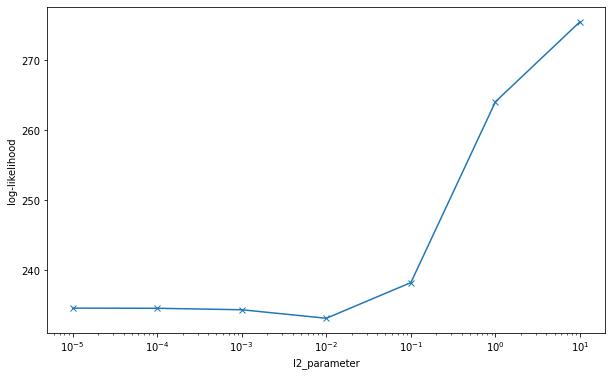

In [8]:
# Plot the log-likelihood for different values of the regularization parameter
plt.figure(figsize = (10,6))
plt.xscale('log')
plt.xlabel('l2_parameter')
plt.ylabel('log-likelihood')
plt.plot(l2_param_set, log_L_set, 'x-')
plt.show()

In [9]:
best_param = l2_param_set[np.argmin(log_L_set)]
print('The regularization parameter that minimizes the log-likelihood on the validation data is: ')
print('l2_param = ', best_param)

The regularization parameter that minimizes the log-likelihood on the validation data is: 
l2_param =  0.01


## Bayesian Logistic Regression with Gaussian Priors

### Q9

By Bayes rule, we can write the posterior distribution as

$$ p(w|D) = \frac{p(D|w) \cdot p(w)}{p(D)}$$

Consider both sides as function of $w$, for fixed D, then

$$ p(w|D) = c \cdot p(D|w) \cdot p(w), \space \text{ for some constant } c = \frac {1}{p(D)}$$

Also,

$$ p(D|w) = L_D(w) = \exp(-NLL_D(w))$$

Therefore,

$$ p(w|D) = c \cdot \exp(-NLL_D(w)) \cdot p(w), \space \text{ where constant } c = \frac {1}{p(D)}$$

## Q10

No, the Gaussian $p(w)$ is not a conjugate prior. 

From Q9, we know that $p(w|D) = c \cdot \exp(-NLL_D(w)) \cdot p(w)$, where the likelihood function $\exp(-NLL_D(w))$ is logistic and $p(w)$ is Gaussian.

Therefore, $\exp(-NLL_D(w)) \cdot p(w)$ will never be Gaussian, that is, the posterior $p(w|D)$ is not in the same family(Gaussian) as $p(w)$.

### Q11

The $MAP$ for $w$ minimizes the negative log posterior of $w$ and the regularized logistic function:

$$\begin{eqnarray*}
\hat w_{MAP} &=& argmin(-\log p(w|D)) \\
&=& argmin \frac 1 n \sum_{i=1}^{n} \log (1+\exp (y_iw^Tx_i)) + \lambda\|w\|^{2} &&&&& (1)
\end{eqnarray*}$$

From Q10, we have that

$$\begin{eqnarray*}
-\log p(w|D)) &=& -\log( c \cdot \exp(-NLL_D(w)) \cdot p(w))\\
&=& -\log c + NLL_D(w) - \log (p(w)) \\ 
\end{eqnarray*}$$

where $c$ is a constant $NLL_D(w) = n \cdot \hat R_n(w)$

Given the piror $p(w)$ is Gaussian,

$$\log (p(w)) = -\frac 1 2 \log(|2 \pi \Sigma|) + \frac 1 2 w^T \Sigma^{-1} w$$

Want to find $\Sigma$ such that equation (1) holds.

Notice that the only term that match with $\frac 1 2 w^T \Sigma^{-1} w$ is $\lambda\|w\|^{2}$, and since $NLL_D(w) = n \cdot \hat R_n(w)$,  we need to have

$$\frac 1 2 w^T \Sigma^{-1} w = n \cdot \lambda\|w\|^{2} $$

Solve for $\Sigma$, we get

$$\Sigma = \frac {1} {2 n \lambda} I$$

### Q12

To have the $ERM$ equal to the $MAP$ estimator, we need

$$\Sigma = \frac {1} {2 n \lambda} I$$

Here we choose $\Sigma  = I$, then 

$$\lambda = \frac {1} {2n}$$

### Q13

$$\begin{eqnarray*}
p(x=H|\theta_1, \theta_2) &=& p(x=H,z=H|\theta_1, \theta_2) + p(x=H,z=T|\theta_1, \theta_2) \\
&=& p(x=H|z=H, \theta_2) \cdot p(z=H|\theta_1) +  p(x=H|z=T, \theta_2) \cdot p(z=T|\theta_1) \\
&=& \theta_2 \cdot \theta_1 + 0 \cdot (1-\theta_1) \\
&=& \theta_1 \theta_2
\end{eqnarray*}$$

### Q14

The likelihood of $D_r$ as a function of $\theta_1$ and $\theta_2$:

$$\begin{eqnarray*}
p(D_r|\theta_1, \theta_2) &=& {N_r \choose n_h} \cdot (\theta_1 \theta_2)^{n_h} \cdot (1-\theta_1 \theta_2)^{n_t}
\end{eqnarray*}$$

### Q15

No, we only have a dataset with reported results where head is reported with probability $\theta_1 \theta_2$ and tail is reported with $1 - \theta_1 \theta_2$. This means that we can only use $MLE$ to estimate the parameter $\theta_1 \theta_2$, but not $\theta_1$ and $\theta_2$ seperately.

### Q16

The likelihood function on the two datasets is:

$$\begin{eqnarray*}
L(\theta_1, \theta_2) &=& p(D_r,D_c|\theta_1, \theta_2) \\
&=& p(D_r|\theta_1, \theta_2) \cdot p(D_c|\theta_1) &(D_c \text{ only depends on } \theta_1)\\
&=& {N_r \choose n_h} \cdot (\theta_1 \theta_2)^{n_h} \cdot (1-\theta_1 \theta_2)^{n_t} \cdot {N_c \choose c_h} \cdot \theta_{1} ^{c_h} \cdot (1-\theta_1 )^{c_t}
\end{eqnarray*}$$

Then the log likelihood function is:

$$ \log(L(\theta_1, \theta_2)) = \log{N_r \choose n_h} + \log{N_c \choose c_h} + n_h \log(\theta_1 \theta_2) + n_t \log(1-\theta_1 \theta_2) + c_h \log\theta_{1} + c_t \log(1-\theta_1)$$

We want to find $\theta_1$ and $\theta_2$ that maximize the log likelihood, so we take the partial derivatives for $\theta_1$ and $\theta_2$:

$$\begin{eqnarray*}
\frac{\partial \log(L(\theta_1, \theta_2))} {\partial \theta_1} &=& \frac{n_h}{\theta_1} - \frac{n_t \theta_2}{1-\theta_1 \theta_2} + \frac{c_h}{\theta_1} - \frac {c_t}{1-\theta_1} \\
\frac{\partial \log(L(\theta_1, \theta_2))} {\partial \theta_2} &=& \frac{n_h}{\theta_2} - \frac{n_t \theta_1}{1-\theta_1 \theta_2}
\end{eqnarray*}$$

To have both the partial derivatives equal to 0, we get

$$\begin{eqnarray*}
\theta_1 \theta_2 &=& \frac {n_h}{n_h+n_t} \\
\theta_1 &=&  \frac {c_h}{c_h+c_t}
\end{eqnarray*}$$

Further solve for $\theta_2$, the $MLE$ estimate for $\theta_1$ and $\theta_2$ is:

$$\begin{eqnarray*}
\theta_1 &=& \frac {c_h}{c_h+c_t} \\
\theta_2 &=& \frac{n_h(c_h+c_t)}{c_h(n_h+n_t)}
\end{eqnarray*}$$

### Q17

The prior distribution for $\theta_1$ is:

$$\theta_1 \sim Beta(h,t)$$

After obtaining the dataset $D_c$, the posterior distribution becomes:

$$\theta_1 \sim Beta(h+c_h,t+c_t)$$

Then the $MAP$ estimate for $\theta_1$ is the mode of the Beta distribution, which is

$$\theta_1 = \frac {h+c_h-1}{h+c_h+t+c_t-2}$$

From the previous question, we obtain that the $MLE$ for $\theta_1 \theta_2$ is

$$\theta_1 \theta_2 = \frac {n_h}{n_h+n_t}$$

Solve for $\theta_2$, the $MAP$ estimate for $\theta_2$ is:

$$\theta_2 = \frac{n_h(h+c_h+t+c_t-2)}{(n_h+n_t)(h+c_h-1)}$$